<a href="https://colab.research.google.com/github/julmiha25-sys/Python/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D1%8B/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BB%D0%BE%D0%B3%D0%BE%D0%B2_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D1%81%D0%BF%D0%B8%D1%81%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1034, 186)

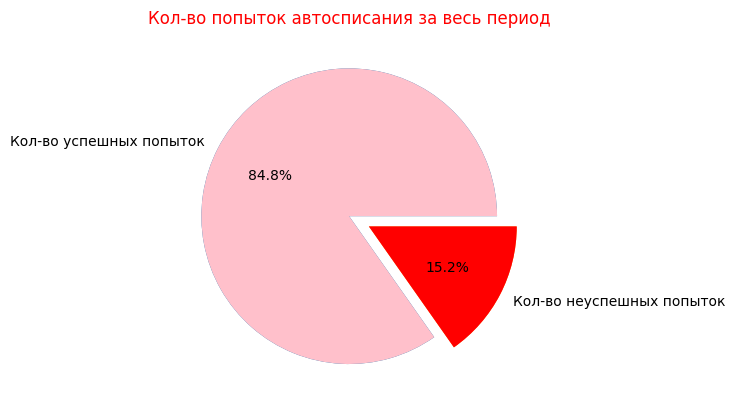

In [11]:
import os
from datetime import datetime
def count_success_and_failure(file_path):
  if not os.path.exists(file_path):
    print(f"❌ Файл не найден: {file_path}")
    return None
  with open(file_path, 'r') as f:
    lines = f.readlines()
  i=sum(1 for line in lines if line.strip().startswith("ERROR") and 'ошибка при списании:' in line.strip()) # Строка с ERROR
  j=sum(1 for current, next_line in zip(lines, lines[1:] + ['']) # Смотрим текущую и следующую
        if current.strip().startswith("INFO") # Текущая с INFO
        and not next_line.strip().startswith("ERROR") and 'Обновляем подписку' in current.strip()) # За ней не идет строка с ERROR, но есть фраза 'Обновляем подписку'

  # Визуализация
  import pandas as pd
  import matplotlib.pyplot as plt
  df=pd.DataFrame([j, i],columns=['Значения'] )
  labels=['Кол-во успешных попыток', 'Кол-во неуспешных попыток']
  plt.title('Кол-во попыток автосписания за весь период',color='Red')
  plt.pie(df['Значения'],explode=[0,0.15])
  plt.pie(df['Значения'],explode=[0, 0.15],labels=labels,autopct='%1.1f%%',colors=['Pink', 'Red'])

  return (j,i)

count_success_and_failure('auto_purchase.log')
